In [8]:
import pandas as pd
import numpy as np

In [9]:
data=pd.read_csv("/content/loan_data.csv")

In [10]:
data.head(10)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
6,26.0,female,Bachelor,93471.0,1,RENT,35000.0,EDUCATION,12.42,0.37,3.0,701,No,1
7,24.0,female,High School,95550.0,5,RENT,35000.0,MEDICAL,11.11,0.37,4.0,585,No,1
8,24.0,female,Associate,100684.0,3,RENT,35000.0,PERSONAL,8.90,0.35,2.0,544,No,1
9,21.0,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No,1


In [11]:
data.shape

(45000, 14)

In [12]:
data.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [13]:
print(data.dtypes)

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object


In [14]:
import seaborn as sns

In [15]:
import matplotlib.pyplot as plt

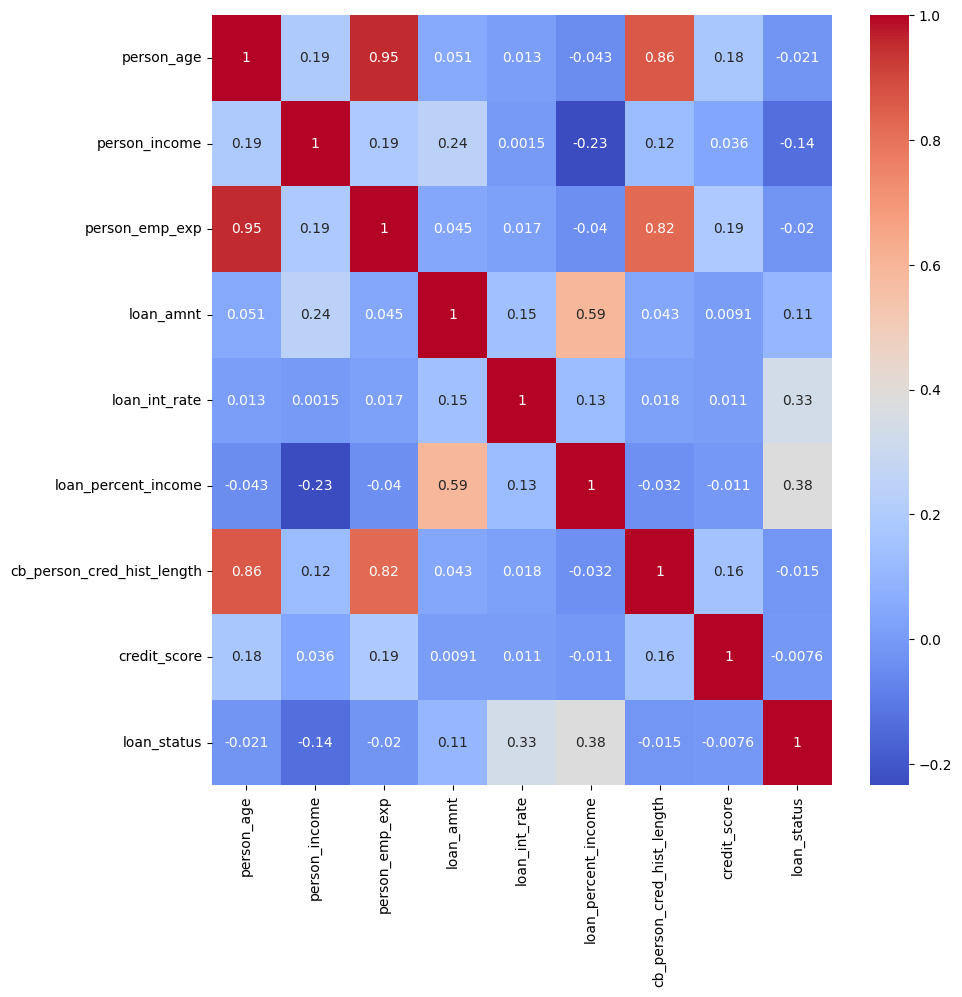

In [16]:
# Filter numeric columns only
numeric_data = data.select_dtypes(include=[np.number])

# Create the heatmap using the filtered numeric data
plt.figure(figsize=(10, 10))
ax = sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')

# Show the plot
plt.show()


loan_status
0    35000
1    10000
Name: count, dtype: int64


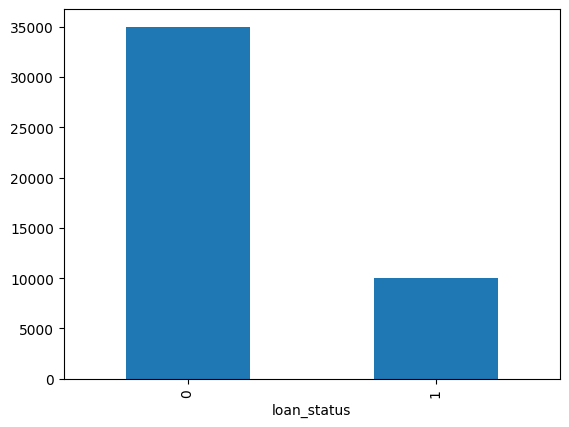

In [17]:
print(data.loan_status.value_counts())
p=data.loan_status.value_counts().plot(kind='bar')

<function matplotlib.pyplot.show(close=None, block=None)>

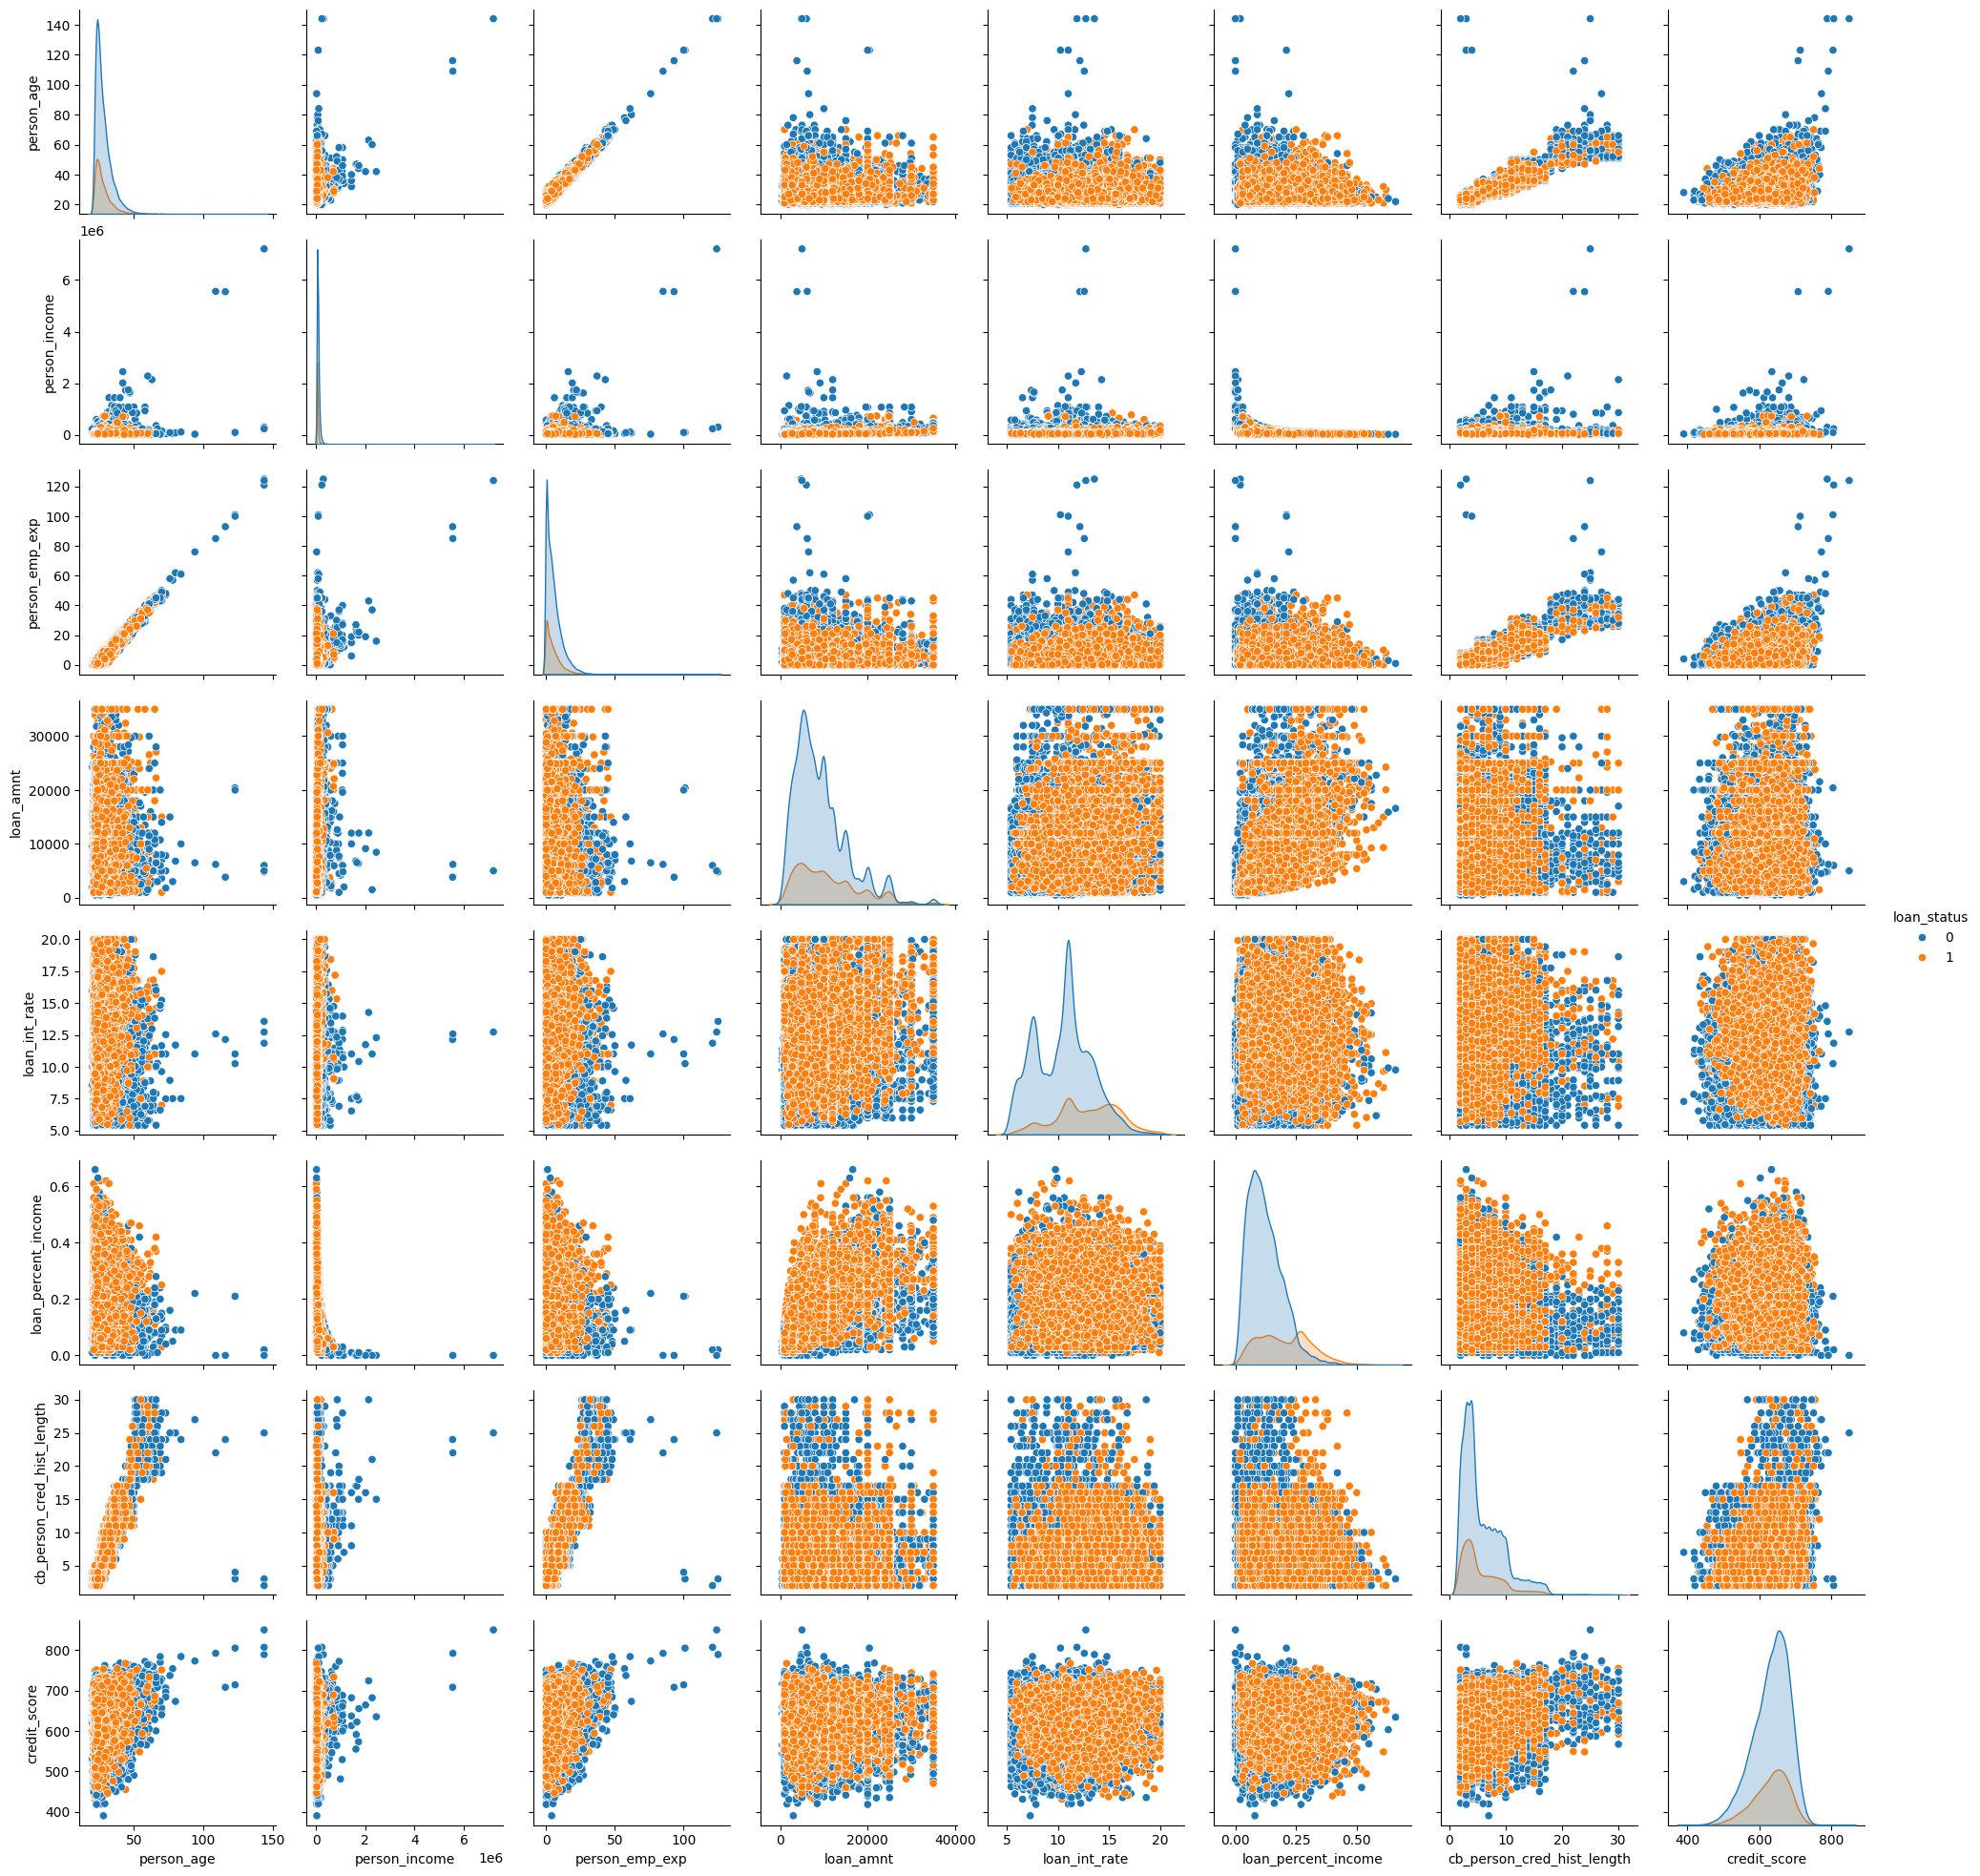

In [18]:
sns.pairplot(data, hue="loan_status")
plt.show

In [19]:
data.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

<Axes: >

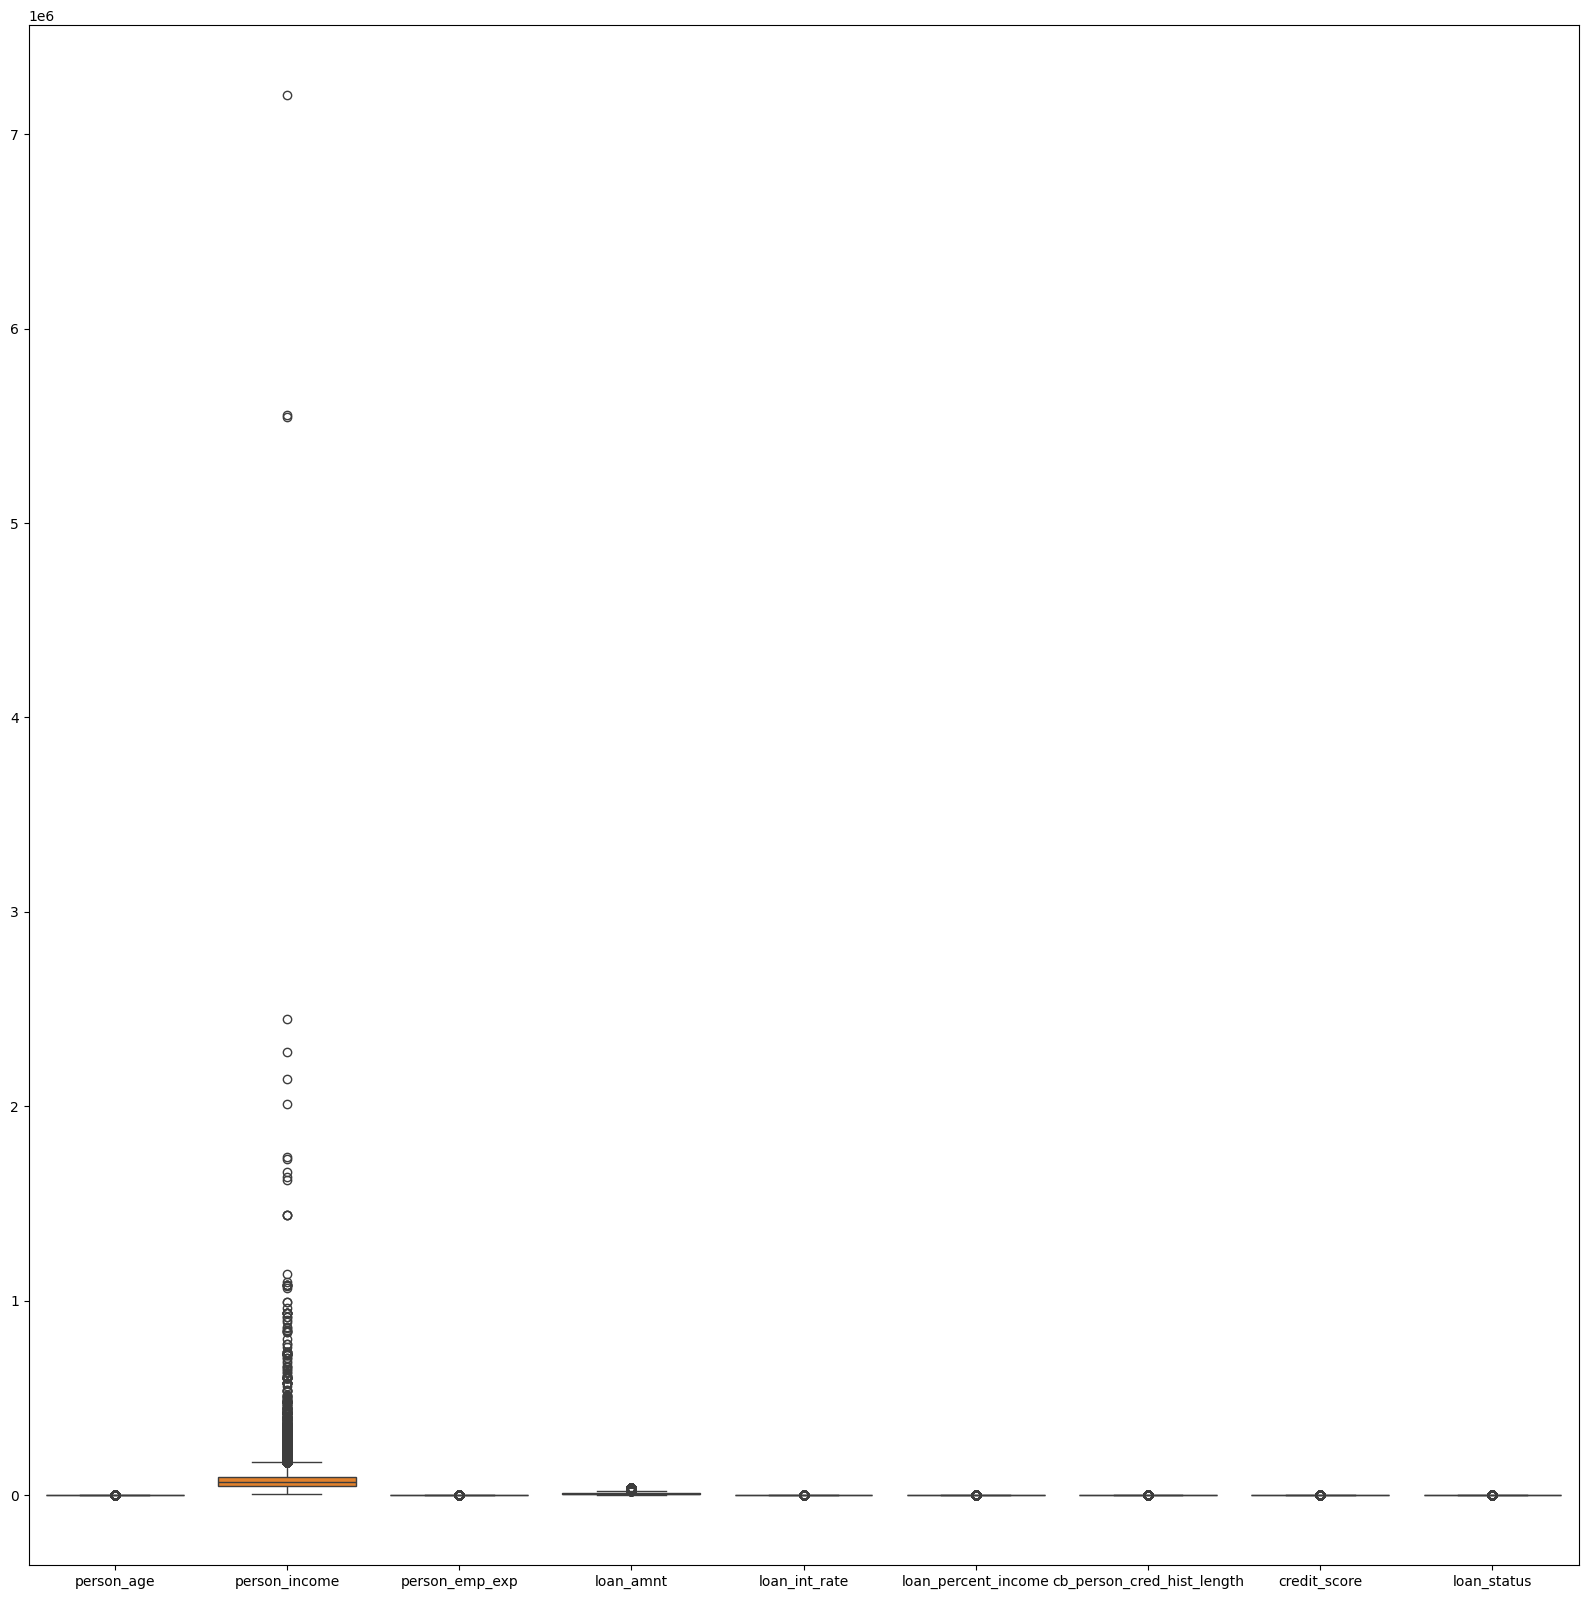

In [20]:
fig, ax=plt.subplots(figsize=(20,20))
sns.boxplot(data=data,ax=ax)

In [35]:
x=numeric_data.drop(columns="loan_status" , axis=1)

In [22]:
y=numeric_data.loan_status

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [24]:
type(x_scaled)

numpy.ndarray

<Axes: >

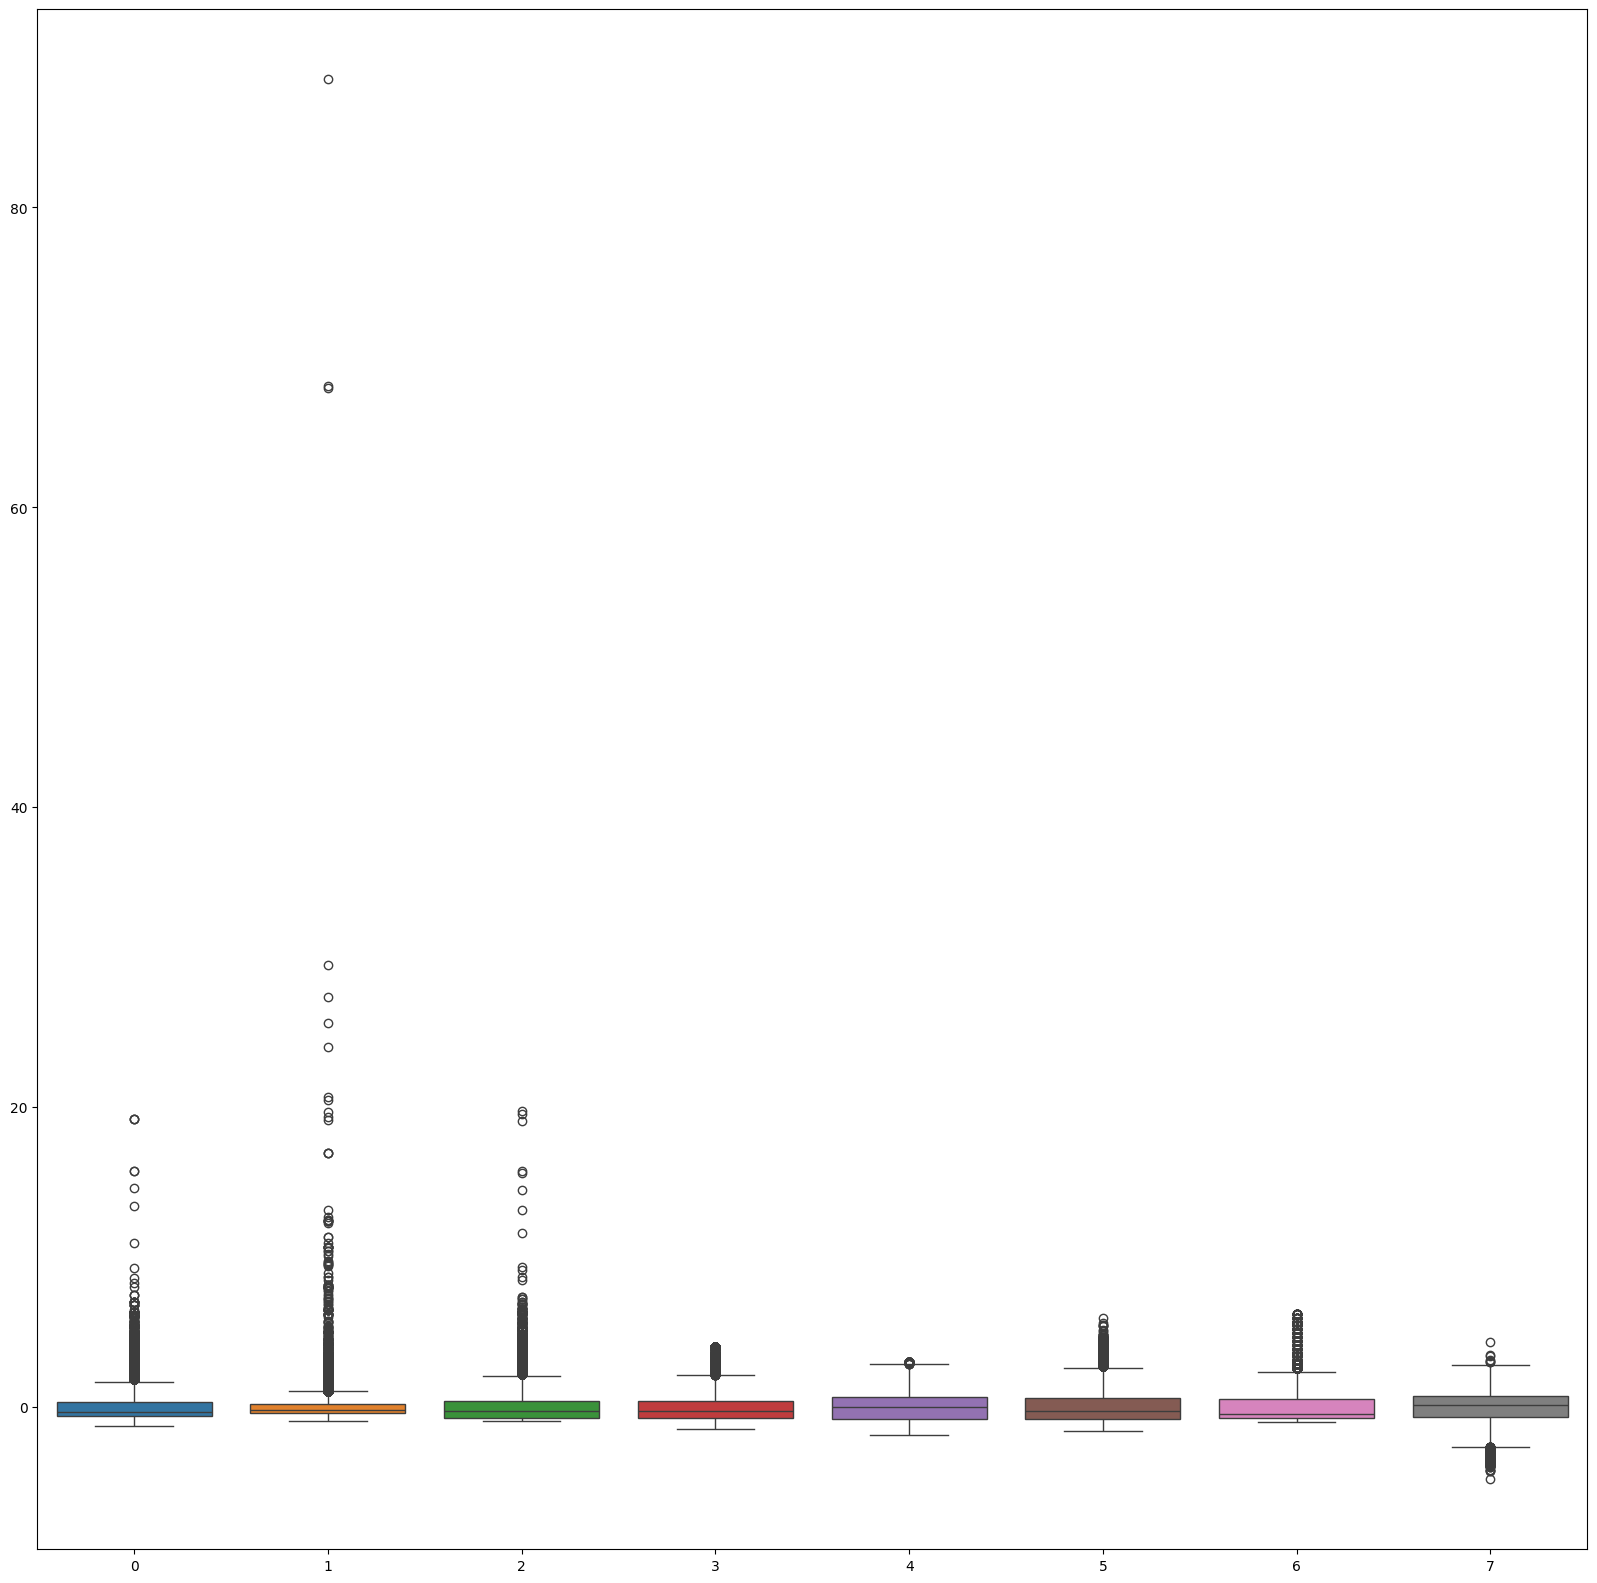

In [25]:
fig, ax=plt.subplots(figsize=(20,20))
sns.boxplot(data=x_scaled,ax=ax)

In [26]:
y

,loan_status
0,1
1,0
2,1
3,1
4,1
...,...
44995,1
44996,1
44997,1
44998,1


In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=32)

In [28]:
x_train

array([[-1.11896309, -0.314829  , -0.3975175 , ...,  0.23248251,
        -0.73910854,  0.52326926],
       [-0.45726369, -0.09393064, -0.06767308, ..., -1.14348535,
        -0.48135391,  0.42413235],
       [ 0.2044357 ,  0.02460715,  0.09724913, ..., -1.25814934,
         0.80741924, -2.74824861],
       ...,
       [-0.95353824, -0.05944986, -0.89228413, ..., -0.79949339,
        -0.48135391,  1.07843593],
       [ 0.2044357 , -0.45587318,  0.42709355, ...,  2.64042628,
         1.06517387,  0.8999895 ],
       [-0.29183884, -0.47504714, -0.56243971, ..., -0.45550142,
        -0.73910854,  0.08706688]])

In [29]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [30]:
y_pred=model.predict(x_test)

In [31]:
y_pred_prob=model.predict_proba(x_test)

In [32]:
print(y_pred_prob)

[[0.46793313 0.53206687]
 [0.93540349 0.06459651]
 [0.54716145 0.45283855]
 ...
 [0.97907229 0.02092771]
 [0.97509081 0.02490919]
 [0.98518827 0.01481173]]


In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[6616,  412],
       [1128,  844]])

y_test shape: (9000,)
y_pred_prob shape: (9000,)


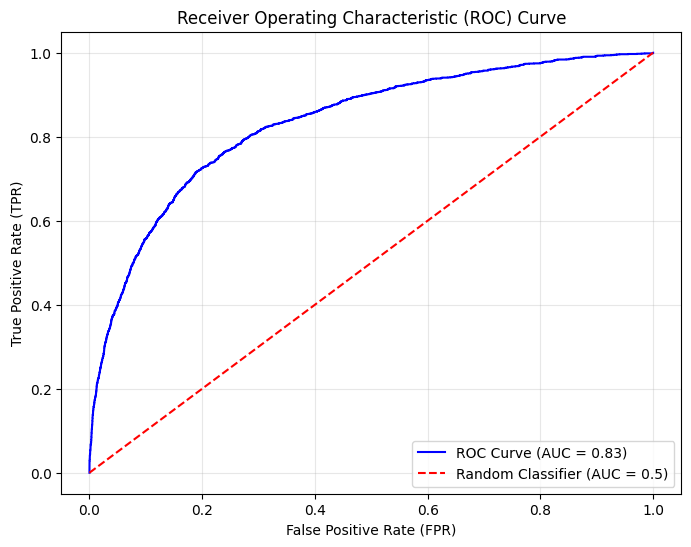

In [34]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Ensure y_pred_prob contains probabilities for the positive class
y_pred_prob = model.predict_proba(x_test)[:, 1]  # Assuming model is defined

# Verify dimensions of y_test and y_pred_prob
print("y_test shape:", y_test.shape)  # Should be 1D
print("y_pred_prob shape:", y_pred_prob.shape)  # Should be 1D

# Calculate FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], 'r--', label="Random Classifier (AUC = 0.5)")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


In [68]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

tn, fp, fn, tp = conf_matrix.ravel()

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
false_positive_rate = fp / (fp + tn) if (fp + tn) > 0 else 0

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall (Sensitivity): {recall:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1-Score: {f1_score:.2f}")
print(f"False Positive Rate (FPR): {false_positive_rate:.2f}")


Confusion Matrix:
[[6616  412]
 [1128  844]]
Accuracy: 0.83
Precision: 0.67
Recall (Sensitivity): 0.43
Specificity: 0.94
F1-Score: 0.52
False Positive Rate (FPR): 0.06


The accuracy of the model using imported logistic regression is 0.83. There are 14 colums and 45000 entries. Out of the 45000 entries 35000 have loan_status 0 and 10000 have loan_status 1 which eventualy leads to model being more biased towards determining loan_status 0. There are not NAn values. I eleminated the male-female column. The heat map shows a high corelation between the person's age and the person's employment expierience(0.95). I think there must be a corelation between the person's ownership status and loan_status but I couldn't merge it in heatmap as it includes only numeric corelations. I think the accuracy is low beacuse there were a lot of outliers in all columns. I found the formulas for calculation accuracy,precession etc online.

Problems faced:
1. Coudn't remove outliers
2. Couldn't see the corelation between person's ownership status and loan_status
3. Accuracy is less than expected
4. model is biased towards determining loan_status 0

Confusion Matrix:
[[6724  304]
 [1220  752]]
Accuracy: 0.83
Precision: 0.71
Recall: 0.38
F1 Score: 0.50


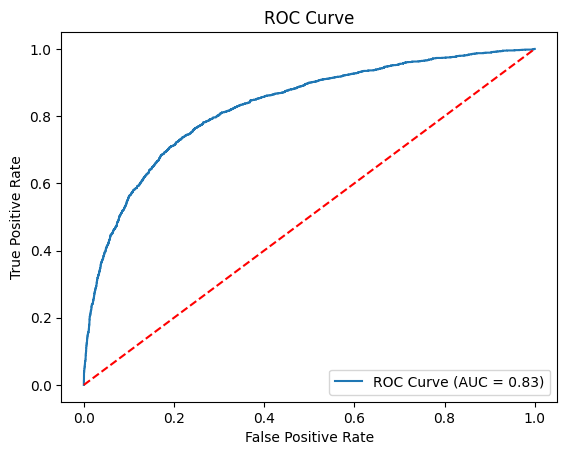

In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

class Regression():
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, x, y):
        self.m, self.n = x.shape
        self.W = np.zeros(self.n)
        self.b = 0
        self.x = x
        self.y = y

        for i in range(self.iterations):
            self.update_weights()

    def update_weights(self):
        A = 1 / (1 + np.exp(-(self.x.dot(self.W) + self.b)))
        tmp = A - self.y.T
        tmp = np.reshape(tmp, self.m)
        dW = np.dot(self.x.T, tmp) / self.m
        db = np.sum(tmp) / self.m

        self.W -= self.learning_rate * dW
        self.b -= self.learning_rate * db

    def predict(self, x):
        Z = 1 / (1 + np.exp(-(x.dot(self.W) + self.b)))
        y = np.where(Z > 0.5, 1, 0)
        return y

model = Regression(learning_rate=0.01, iterations=1000)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

y_pred_prob = 1 / (1 + np.exp(-(x_test.dot(model.W) + model.b)))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


This is a Logistic Regression model using Scratch. Suprising both the models showed same accuracy.

I found the ROC curve and formulas to calculate accuracy,precision,recall and F1-score online